# Linear Regression (One Feature and m Training Examples)

## Hypothesis
We will use $\mathbf{𝐱_𝐢}$  to denote the feature vector and  $\mathbf{𝐲_𝐢}$  to denote output variable for $\mathbf{i^{th}}$ training example.  

$h(x)=wx^{(i)}+b$  

Let us have $m$ training example then  $𝐢=1,2,3,...m$ and in the present case, we have $m=8$  

Let us write $\hat{y}$ for the prediction from the hypothesis.

$\hat{y}^{(i)} = wx^{(i)}+b $  

In [2]:
import numpy as np
price=np.array([20,28, 39, 51, 75, 130, 210,400])
size=np.array([100,150,200,250,500, 1000,2500,5000])
print(price,size)

[ 20  28  39  51  75 130 210 400] [ 100  150  200  250  500 1000 2500 5000]



Let us substitute the data  


$\hat{y}^{(1)} = wx^{(1)}+b = w(100)+b $      `First Training Example`   
$\hat{y}^{(2)} = wx^{(2)}+b = w(150)+b $      `Second Training Example`  
.   
.  
$\hat{y}^{(8)} = wx^{(8)}+b = w(5000)+b $     `Eighth Training Example`


## Cost Function  
$J(w,b)=\frac{1}{2m}\sum \limits _{i=1} ^{m} (\hat{y}-y)^{2} $  
$J(w,b)=\frac{1}{2m}\sum \limits _{i=1} ^{m} ((wx^{(i)}+b)-y)^{2} $  

Start with sum assumed value of $w$ and $b$ and evaluate $J(w,b)$  

$J(w,b)=\frac{1}{2m}[(100w+b-20)^2+(150w+b-28)^2+....+(5000w+b-40)^2]$  

**Our aim is to minimize the cost function,** $J(w,b)$   

Let us drop $b$ to simplify our expression to visulize the plot of cost function in 2D i.e. cost as a function of weight only.

In [3]:
def cost(x,y,w,b):
  yhat=w*x+b
  J=np.dot((yhat-y).T,(yhat-y))
  return J/2*x.shape[0] # x.shape[0] is equal to m

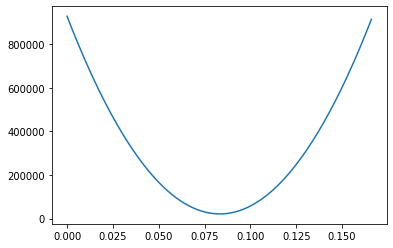

In [4]:
import matplotlib.pyplot as plt
#initialize array to store J for plotting
plotJ=np.array([0,0])
for i in range(167):
  J=cost(size, price, i/1000,0)    # Call cost function to _ and the cost for assumed weight (i/1000)
  plotJ=np.vstack((plotJ,[i/1000,J])) # Stack the value of the w and the cost in plotJ array
  #print(i/100,y,J)
plotJ
plt.plot(plotJ[1:,0], plotJ[1:,1])

In [5]:
# Minimum Loss and its corresponding weight
minLoss=np.min(plotJ[1:,1])
print(minLoss, np.where(plotJ[1:,1] == minLoss))

21432.059999999998 (array([83]),)


### Gradient Descent
$ \frac{\partial J}{\partial w} = \frac{1}{m} \sum \limits _{i=1} ^m (\hat {y}^{(i)}-y^{(i)})x$  

$ \frac{\partial J}{\partial b} = \frac{1}{m} \sum \limits _{i=1} ^m (\hat {y}^{(i)}-y^{(i)})$  

**Substituting**   

$ \frac{\partial J}{\partial w} = \frac{1}{m}[(100w+b-20) (100) +(150w+b-28) (150) +....+(5000w+b-40) (5000)]$  

$ \frac{\partial J}{\partial b} = \frac{1}{m}[(100w+b-20) +(150w+b-28) +....+(5000w+b-40) ]$  

**Updating Parameters**  

$ w = w - \alpha \frac {\partial J}{\partial w}$  

$ b = b - \alpha \frac {\partial J}{\partial b}$  

Where,  
        $ \alpha$ : Learning Rate (0.0001, 0.001, 0.01...)

In [6]:
# Normalizing the Features
size=size/5000

In [7]:
learning_rate=0.0001
max_iteration=2000
cost=np.zeros((max_iteration))
print(size)
w=0.0
b=0.0
for i in range(max_iteration):
  yhat=w*size+b
  cost[i]=np.dot((yhat-price).T,(yhat-price))/2*size.shape[0]
  dw=np.dot((yhat-price).T,size)/size[0]
  db=np.sum((yhat-price), axis=0)/size[0]
  w=w-learning_rate*dw
  b=b-learning_rate*db
print(w, b)

[0.02 0.03 0.04 0.05 0.1  0.2  0.5  1.  ]
374.4374652991815 28.327414592331717


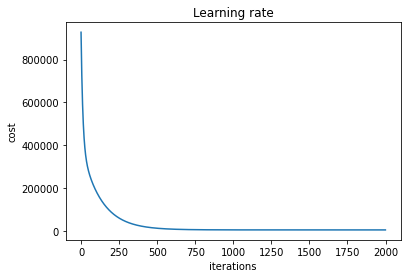

In [8]:
# Plot learning curve (with costs)
plt.plot(cost)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate")
plt.show()

 
374.6 x + 28.29


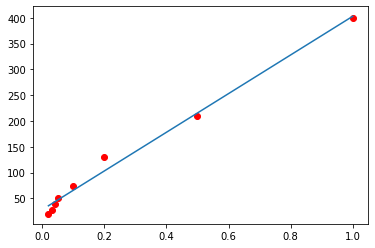

In [9]:
# Using Matplotlib function for linear fiiting
plt.scatter(size,price,color="red")
linear_model=np.polyfit(size,price,1)
hypothesis =np.poly1d(linear_model)
print(hypothesis)
plt.plot(size,hypothesis(size))
plt.show()

In [10]:

from sklearn import linear_model
size=np.array([[100],[150],[200],[250],[500], [1000],[2500],[5000]])
price=np.array([20,28, 39, 51, 75, 130, 210, 400])


In [11]:
print(size.shape, type(size), price.shape, type(price))
# print(size, price)

(8, 1) <class 'numpy.ndarray'> (8,) <class 'numpy.ndarray'>


In [12]:
# Create a Logistic Regression Object, perform Logistic Regression
lr = linear_model.LinearRegression()
lr.fit(size, price)

LinearRegression()

In [13]:
print(lr.coef_)
print(lr.intercept_)

[0.07491407]
28.291694113419965
